In [35]:
import scipy.io
import numpy as np
import sys
import matplotlib as plt
sys.path.append('..\Rodamientos_data')

# Load the .mat file
# file_path_1 = 'data\\1 Data collected from a healthy bearing\\H-A-2.mat'
# file_path_2 = 'data\\2 Data collected from a bearing with inner race fault\\I-A-2.mat'
# file_path_3 = 'data\\3 Data collected from a bearing with outer race fault\\O-A-2.mat'
# file_path_4 = 'data\\4 Data collected from a bearing with ball fault\\B-A-2.mat'
file_path_5 = 'data\\5 Data collected from a bearing with a combination of faults\\C-A-2.mat'
data = scipy.io.loadmat(file_path_5)

# Display the keys and a brief description of the data structure
data_description = {key: ('array' if isinstance(value, np.ndarray) else type(value).__name__) for key, value in data.items()}
data_description

{'__header__': 'bytes',
 '__version__': 'str',
 '__globals__': 'list',
 'Channel_1': 'array',
 'Channel_2': 'array'}

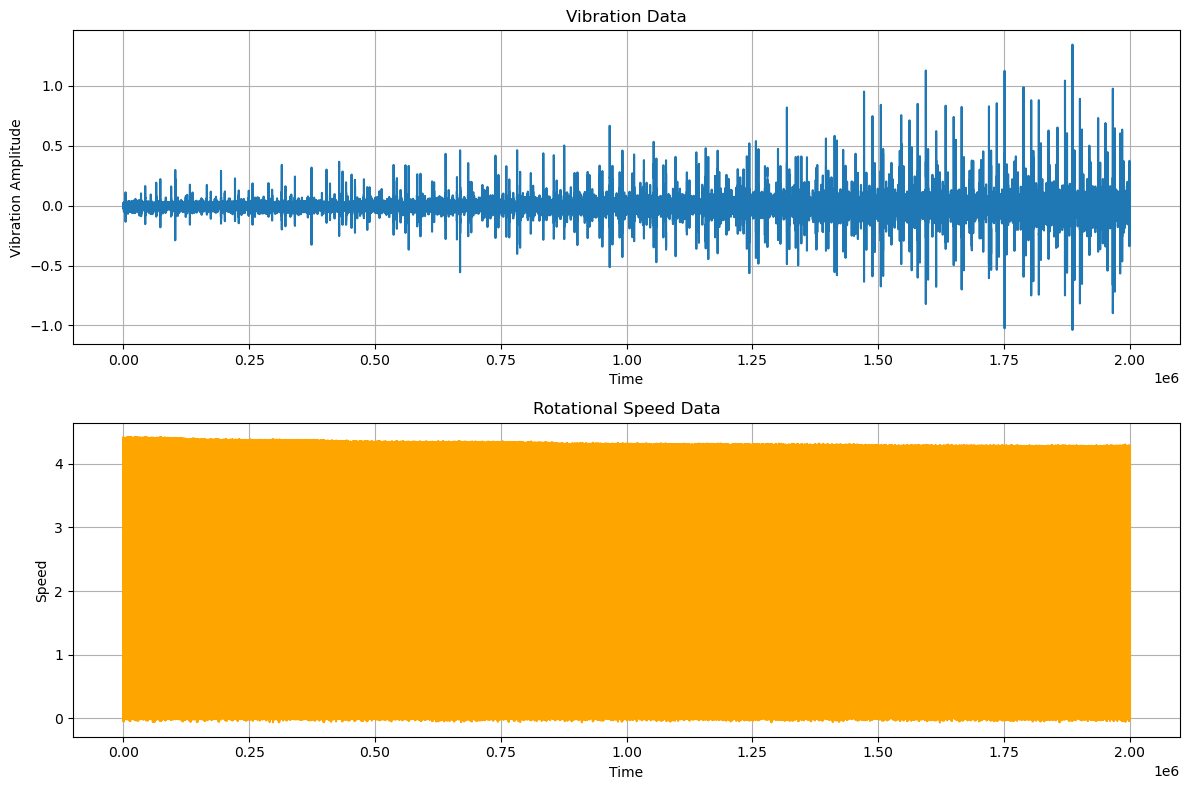

In [36]:
import matplotlib.pyplot as plt

# Extracting the vibration data and rotational speed data
vibration_data = data['Channel_1'].squeeze()
rotational_speed_data = data['Channel_2'].squeeze()

# Number of data points
num_points = len(vibration_data)

# Assuming a regular time interval, creating a time array
time_array = np.arange(num_points)

# Plotting both vibration data and rotational speed data
plt.figure(figsize=(12, 8))

# Vibration data plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(time_array, vibration_data, label="Vibration Data")
plt.title("Vibration Data")
plt.xlabel("Time")
plt.ylabel("Vibration Amplitude")
plt.grid(True)

# Rotational speed data plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(time_array, rotational_speed_data, label="Rotational Speed", color="orange")
plt.title("Rotational Speed Data")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

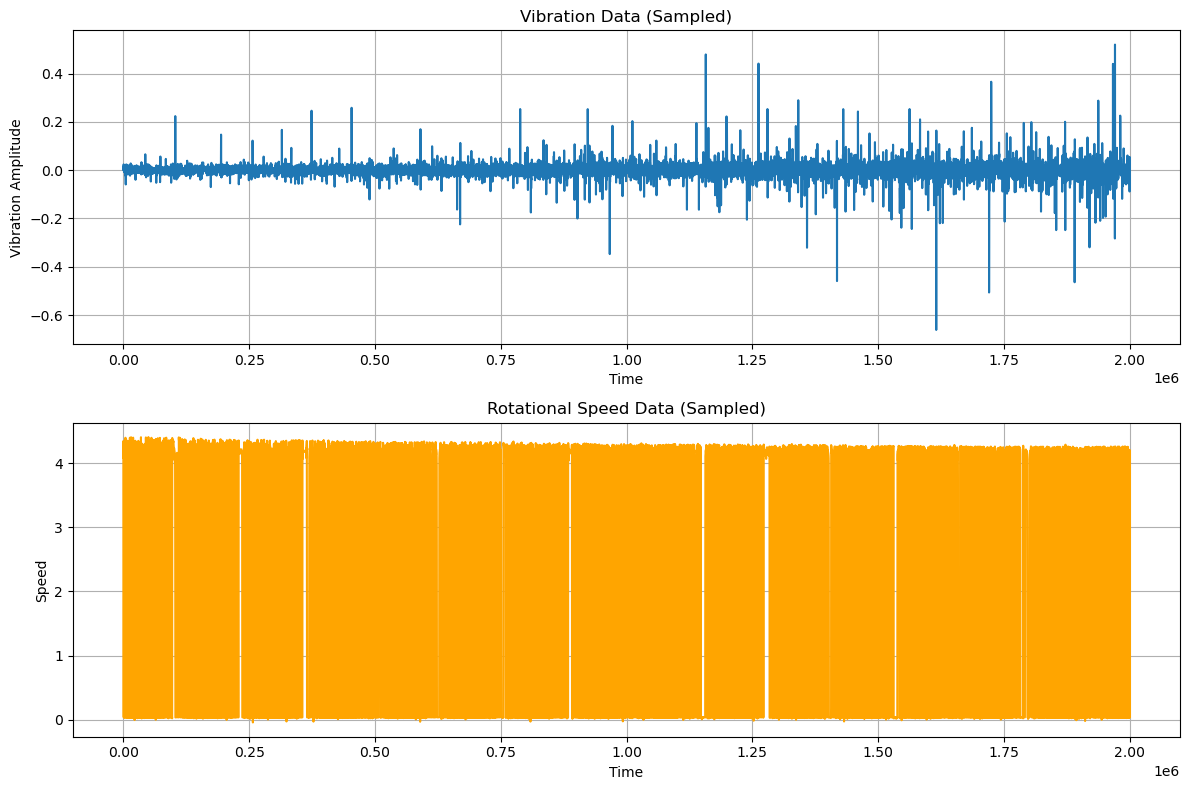

In [37]:
# Adjusting the parameter to handle large data sets
plt.rcParams['agg.path.chunksize'] = 10000

# Sampling the data if it's too large for efficient plotting
# We'll use every nth point to reduce the size of the dataset for plotting
n = max(1, num_points // 10000)

# Creating a downsampled time array and corresponding data points
time_sampled = time_array[::n]
vibration_data_sampled = vibration_data[::n]
rotational_speed_data_sampled = rotational_speed_data[::n]

# Plotting both vibration data and rotational speed data with the sampled data
plt.figure(figsize=(12, 8))

# Vibration data plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(time_sampled, vibration_data_sampled, label="Vibration Data")
plt.title("Vibration Data (Sampled)")
plt.xlabel("Time")
plt.ylabel("Vibration Amplitude")
plt.grid(True)

# Rotational speed data plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(time_sampled, rotational_speed_data_sampled, label="Rotational Speed", color="orange")
plt.title("Rotational Speed Data (Sampled)")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

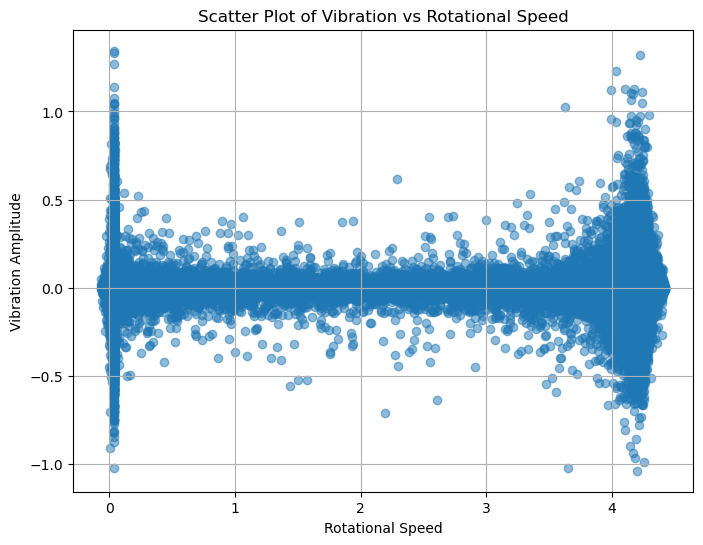

(-0.0002765172897129935, 0.69575712584143)

In [38]:
from scipy.stats import pearsonr

# Calculating the Pearson correlation coefficient
correlation_coef, p_value = pearsonr(vibration_data, rotational_speed_data)

# Plotting the scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(rotational_speed_data, vibration_data, alpha=0.5)
plt.title("Scatter Plot of Vibration vs Rotational Speed")
plt.xlabel("Rotational Speed")
plt.ylabel("Vibration Amplitude")
plt.grid(True)
plt.show()

correlation_coef, p_value